In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from datetime import datetime, timedelta

Modelos entrenados con los datos después de aplicar PCA

## Carga de datos

Se cargan los datos procesados previamente desde el fichero pickle en un dataframe y se determina su tamaño

In [2]:
datos = pd.read_pickle('Datos_descarga_proc_2023-05-05_134703_conPCA.pickle')
datos.shape

(116185, 8)

In [3]:
datos.head()

,componente1,componente2,componente3,componente4,componente5,componente6,componente7,eficiencia_descarga
time,,,,,,,,
2017-01-16 17:53:00,-0.347299,-0.217648,-0.162539,0.477760,0.311185,0.013841,0.112844,0.306006
2017-01-16 17:54:00,-0.350084,-0.227951,-0.177204,0.474238,0.361250,0.014090,0.155471,0.307990
2017-01-16 17:55:00,-0.353388,-0.218600,-0.147487,0.493382,0.293289,0.024799,0.094036,0.312124
2017-01-16 17:56:00,-0.353650,-0.215037,-0.148358,0.482319,0.328331,0.025416,0.134572,0.314885
2017-01-16 17:57:00,-0.356481,-0.217904,-0.159874,0.470682,0.384702,0.019514,0.191868,0.317008


<AxesSubplot: xlabel='time', ylabel='eficiencia_descarga'>

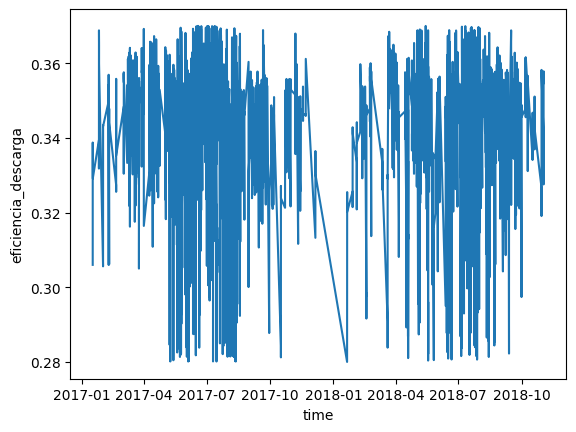

In [4]:
sns.lineplot(data=datos, x=datos.index, y="eficiencia_descarga")

Antes de poder entrenar los modelos, se divide el dataset en datos de entrenamiento y de validación.

In [5]:
filas_entrenamiento = int(len(datos)*0.8)
datos_entrenamiento = datos[:filas_entrenamiento]
datos_validacion = datos[filas_entrenamiento:]

X = datos.drop('eficiencia_descarga', axis=1)
X_ent = datos_entrenamiento.drop('eficiencia_descarga', axis=1)
y_ent = datos_entrenamiento['eficiencia_descarga']
X_val = datos_validacion.drop('eficiencia_descarga', axis=1)
y_val = datos_validacion['eficiencia_descarga']

In [6]:
datos_entrenamiento.tail()

,componente1,componente2,componente3,componente4,componente5,componente6,componente7,eficiencia_descarga
time,,,,,,,,
2018-07-17 20:34:00,0.460201,0.589630,0.172666,0.159366,0.017499,0.014546,-0.045603,0.335641
2018-07-17 20:35:00,0.459286,0.591764,0.180091,0.151235,-0.006130,0.025211,-0.065742,0.331968
2018-07-17 20:36:00,0.457097,0.599294,0.191522,0.150267,-0.034554,0.030105,-0.100628,0.331791
2018-07-17 20:37:00,0.451811,0.580669,0.161695,0.149631,0.055391,0.004546,-0.009449,0.331201
2018-07-17 20:38:00,0.450136,0.584845,0.174249,0.149311,0.021390,0.014746,-0.044144,0.329223


In [7]:
datos_validacion

,componente1,componente2,componente3,componente4,componente5,componente6,componente7,eficiencia_descarga
time,,,,,,,,
2018-07-17 20:39:00,0.452980,0.586223,0.176950,0.152929,0.015571,0.014721,-0.054529,0.334118
2018-07-17 20:40:00,0.454784,0.580043,0.174996,0.149265,0.021798,0.017302,-0.041650,0.335187
2018-07-17 20:41:00,0.452109,0.579824,0.175243,0.143831,0.019703,0.015695,-0.042096,0.334209
2018-07-17 20:42:00,0.458292,0.578004,0.189933,0.134763,-0.021463,0.046056,-0.074978,0.336157
2018-07-17 20:43:00,0.454586,0.580403,0.186922,0.145361,-0.006790,0.028844,-0.075342,0.336533
...,...,...,...,...,...,...,...,...
2018-11-01 19:12:00,-0.492497,-0.477170,-0.144359,0.109519,-0.046130,-0.196525,0.149488,0.355668
2018-11-01 19:13:00,-0.495538,-0.473664,-0.147010,0.116767,-0.031583,-0.211864,0.148064,0.354810
2018-11-01 19:14:00,-0.494464,-0.467435,-0.128952,0.113411,-0.084652,-0.204511,0.112542,0.354186


## Media

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Cálculo de la media de y_ent
media = np.mean(y_ent)

print("Media eficiencia: {:2f}%".format(media*100))

# Predicciones en el conjunto de validación y en el dataset total
predicciones_media = np.full(len(y_val), media)
datos['eficiencia_descarga_media'] = media

# Métricas de evaluación
mse_media = mean_squared_error(y_val, predicciones_media)
rmse_media = np.sqrt(mse_media)
r2_media = r2_score(y_val, predicciones_media)

print("Métricas de evaluación para el modelo de la media:")
print("RMSE: {:2f}%".format(rmse_media*100))
print("R2: ", r2_media)

Media eficiencia: 34.121352%
Métricas de evaluación para el modelo de la media:
RMSE: 1.238113%
R2:  -0.007822904882182957


Se representa la media en un día con valores pertenecientes al dataset de entrenamiento y otro día con valores del dataset de validación

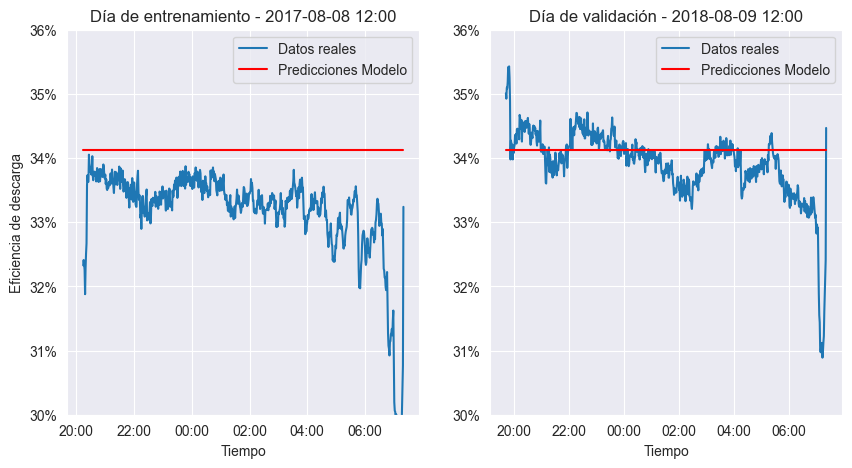

In [9]:
fecha_entrenamiento = '2017-08-08 12:00'
fecha_validacion = '2018-08-09 12:00'

dia_entrenamiento = datetime.strptime(fecha_entrenamiento, '%Y-%m-%d %H:%M')
dia_validacion = datetime.strptime(fecha_validacion, '%Y-%m-%d %H:%M')

# Filtrar datos dentro del rango de fechas
datos_dia_entrenamiento = datos.loc[dia_entrenamiento:dia_entrenamiento+pd.DateOffset(days=1)]
datos_dia_validacion = datos.loc[dia_validacion:dia_validacion+pd.DateOffset(days=1)]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Datos reales
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y='eficiencia_descarga', label='Datos reales', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y='eficiencia_descarga', label='Datos reales', ax=axes[1])

# Predicciones
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y="eficiencia_descarga_media", color='red', label='Predicciones Modelo', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y="eficiencia_descarga_media", color='red', label='Predicciones Modelo', ax=axes[1])

# Formato
axes[0].set_title('Día de entrenamiento - ' + fecha_entrenamiento)
axes[1].set_title('Día de validación - ' + fecha_validacion)
axes[0].set_xlabel('Tiempo')
axes[1].set_xlabel('Tiempo')
axes[0].set_ylabel('Eficiencia de descarga')
axes[1].set_ylabel('')
axes[0].set_ylim(0.30, 0.36)
axes[1].set_ylim(0.30, 0.36)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression

# Creación y entrenamiento del modelo de Regresión Lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_ent, y_ent)

# Predicciones en el conjunto de validación y en el dataset total
predicciones_regresion_lineal = modelo_regresion_lineal.predict(X_val)
datos['eficiencia_descarga_rl'] = modelo_regresion_lineal.predict(X)

# Métricas de evaluación
mse_regresion_lineal = mean_squared_error(y_val, predicciones_regresion_lineal)
rmse_regresion_lineal = np.sqrt(mse_regresion_lineal)
r2_regresion_lineal = r2_score(y_val, predicciones_regresion_lineal)

print("Métricas de evaluación para el modelo de Regresión Lineal:")
print("RMSE: {:2f}%".format(rmse_regresion_lineal*100))
print("R2: ", r2_regresion_lineal)

Métricas de evaluación para el modelo de Regresión Lineal:
RMSE: 0.829347%
R2:  0.5477947430172885


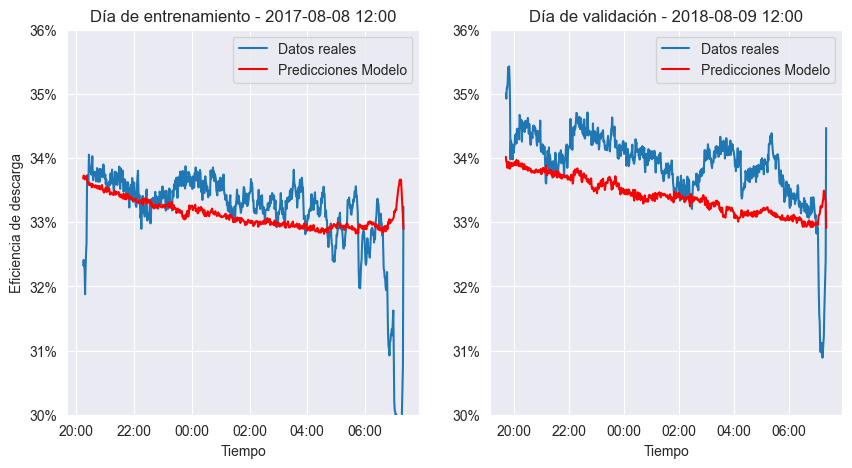

In [11]:
fecha_entrenamiento = '2017-08-08 12:00'
fecha_validacion = '2018-08-09 12:00'

dia_entrenamiento = datetime.strptime(fecha_entrenamiento, '%Y-%m-%d %H:%M')
dia_validacion = datetime.strptime(fecha_validacion, '%Y-%m-%d %H:%M')

# Filtrar datos dentro del rango de fechas
datos_dia_entrenamiento = datos.loc[dia_entrenamiento:dia_entrenamiento+pd.DateOffset(days=1)]
datos_dia_validacion = datos.loc[dia_validacion:dia_validacion+pd.DateOffset(days=1)]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Datos reales
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y='eficiencia_descarga', label='Datos reales', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y='eficiencia_descarga', label='Datos reales', ax=axes[1])

# Predicciones
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y="eficiencia_descarga_rl", color='red', label='Predicciones Modelo', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y="eficiencia_descarga_rl", color='red', label='Predicciones Modelo', ax=axes[1])

# Formato
axes[0].set_title('Día de entrenamiento - ' + fecha_entrenamiento)
axes[1].set_title('Día de validación - ' + fecha_validacion)
axes[0].set_xlabel('Tiempo')
axes[1].set_xlabel('Tiempo')
axes[0].set_ylabel('Eficiencia de descarga')
axes[1].set_ylabel('')
axes[0].set_ylim(0.30, 0.36)
axes[1].set_ylim(0.30, 0.36)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
    
RF_regressor = RandomForestRegressor()

param = {'bootstrap': [True, False],
        'max_depth': [10, 30, 50, 70, 90, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [400, 800, 1200, 1600, 2000]}

grid = RandomizedSearchCV(estimator= RF_regressor, param_distributions= param, n_iter= 100, cv= 5, random_state= 1, n_jobs= -1)

grid_fit = grid.fit(X = X_ent, y = y_ent)

In [13]:
mejor_rf = grid_fit.best_estimator_
print(mejor_rf)

# Predicciones en los datos de validación
predicciones_rf = mejor_rf.predict(X_val)
datos['eficiencia_descarga_rf'] = mejor_rf.predict(X)

# Métricas de evaluación
mse_rf = mean_squared_error(y_val, predicciones_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, predicciones_rf)

print("Métricas de evaluación para el modelo de Random Forest Regressor:")
print("RMSE: {:2f}%".format(rmse_rf*100))
print("R2: ", r2_rf)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=1200)
Métricas de evaluación para el modelo de Random Forest Regressor:
RMSE: 0.740665%
R2:  0.6393324958125172


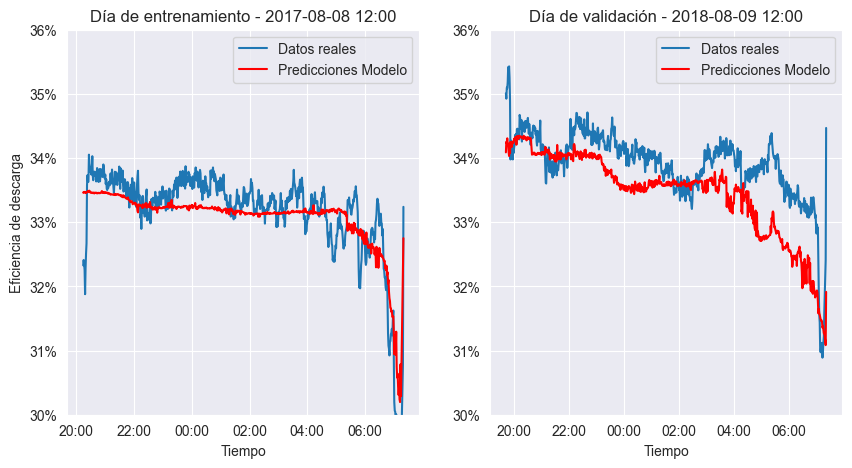

In [14]:
fecha_entrenamiento = '2017-08-08 12:00'
fecha_validacion = '2018-08-09 12:00'

dia_entrenamiento = datetime.strptime(fecha_entrenamiento, '%Y-%m-%d %H:%M')
dia_validacion = datetime.strptime(fecha_validacion, '%Y-%m-%d %H:%M')

# Filtrar datos dentro del rango de fechas
datos_dia_entrenamiento = datos.loc[dia_entrenamiento:dia_entrenamiento+pd.DateOffset(days=1)]
datos_dia_validacion = datos.loc[dia_validacion:dia_validacion+pd.DateOffset(days=1)]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Datos reales
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y='eficiencia_descarga', label='Datos reales', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y='eficiencia_descarga', label='Datos reales', ax=axes[1])

# Predicciones
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y="eficiencia_descarga_rf", color='red', label='Predicciones Modelo', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y="eficiencia_descarga_rf", color='red', label='Predicciones Modelo', ax=axes[1])

# Formato
axes[0].set_title('Día de entrenamiento - ' + fecha_entrenamiento)
axes[1].set_title('Día de validación - ' + fecha_validacion)
axes[0].set_xlabel('Tiempo')
axes[1].set_xlabel('Tiempo')
axes[0].set_ylabel('Eficiencia de descarga')
axes[1].set_ylabel('')
axes[0].set_ylim(0.30, 0.36)
axes[1].set_ylim(0.30, 0.36)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## Support Vector Regression (SVR)

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Posibles valores de hiperparámetros a probar
parametros_svr = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1], 'gamma': [0.1, 'scale', 'auto'], 'epsilon': [0.01, 0.1]}

# Búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_svr = GridSearchCV(estimator=SVR(), param_grid= parametros_svr, cv=5, n_jobs= -1)
grid_svr_fit = grid.fit(X = X_ent, y = y_ent)
modelo_svr = grid_svr_fit.best_estimator_

# Predicciones en los datos de validación
predicciones_svr = modelo_svr.predict(X_val)
datos['eficiencia_descarga_svr'] = modelo_svr.predict(X)

# Métricas de evaluación
mse_svr = mean_squared_error(y_val, predicciones_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_val, predicciones_svr)

print("Métricas de evaluación para el modelo de Support Vector Regression :")
print("RMSE: {:2f}%".format(rmse_svr*100))
print("R2: ", r2_svr)

Métricas de evaluación para el modelo de Support Vector Regression :
RMSE: 0.741339%
R2:  0.6386760614443331


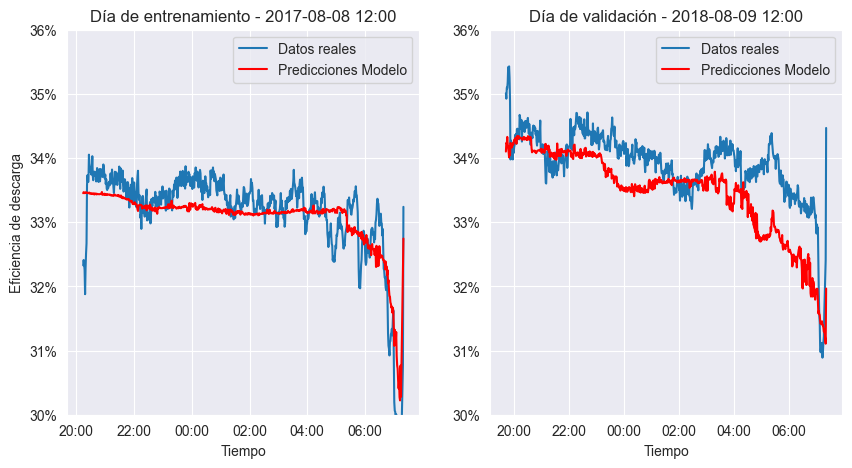

In [16]:
fecha_entrenamiento = '2017-08-08 12:00'
fecha_validacion = '2018-08-09 12:00'

dia_entrenamiento = datetime.strptime(fecha_entrenamiento, '%Y-%m-%d %H:%M')
dia_validacion = datetime.strptime(fecha_validacion, '%Y-%m-%d %H:%M')

# Filtrar datos dentro del rango de fechas
datos_dia_entrenamiento = datos.loc[dia_entrenamiento:dia_entrenamiento+pd.DateOffset(days=1)]
datos_dia_validacion = datos.loc[dia_validacion:dia_validacion+pd.DateOffset(days=1)]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Datos reales
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y='eficiencia_descarga', label='Datos reales', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y='eficiencia_descarga', label='Datos reales', ax=axes[1])

# Predicciones
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y="eficiencia_descarga_svr", color='red', label='Predicciones Modelo', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y="eficiencia_descarga_svr", color='red', label='Predicciones Modelo', ax=axes[1])

# Formato
axes[0].set_title('Día de entrenamiento - ' + fecha_entrenamiento)
axes[1].set_title('Día de validación - ' + fecha_validacion)
axes[0].set_xlabel('Tiempo')
axes[1].set_xlabel('Tiempo')
axes[0].set_ylabel('Eficiencia de descarga')
axes[1].set_ylabel('')
axes[0].set_ylim(0.30, 0.36)
axes[1].set_ylim(0.30, 0.36)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostRegressor

# Posibles valores de hiperparámetros a probar
parametros_ada = {'n_estimators': [50, 100],
              'learning_rate': [0.01, 0.1]}

# Búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros
grid_ada = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=parametros_ada, cv=5, n_jobs=-1)
grid_ada_fit = grid.fit(X = X_ent, y = y_ent)
modelo_ada = grid_ada_fit.best_estimator_

# Predicciones en los datos de validación
predicciones_ada = modelo_ada.predict(X_val)
datos['eficiencia_descarga_ada'] = modelo_ada.predict(X)

# Métricas de evaluación
mse_ada = mean_squared_error(y_val, predicciones_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_val, predicciones_ada)

print("Métricas de evaluación para el modelo de AdaBoost :")
print("RMSE: {:2f}%".format(rmse_ada*100))
print("R2: ", r2_ada)

Métricas de evaluación para el modelo de AdaBoost :
RMSE: 0.743724%
R2:  0.6363472995096459


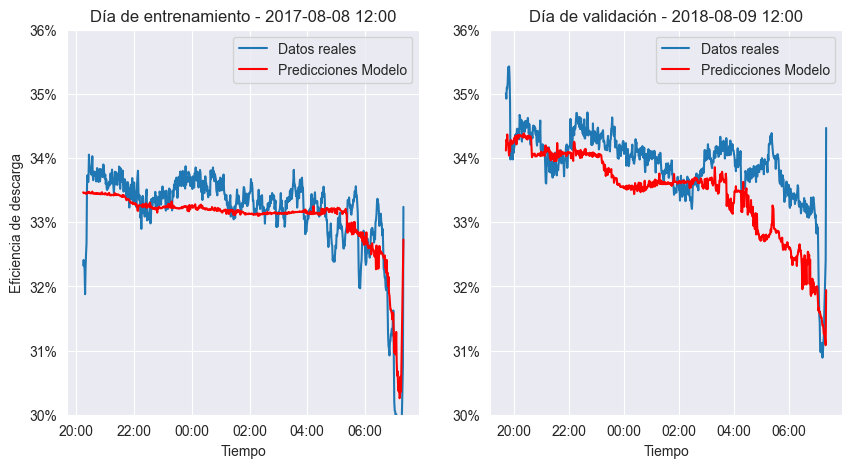

In [18]:
fecha_entrenamiento = '2017-08-08 12:00'
fecha_validacion = '2018-08-09 12:00'

dia_entrenamiento = datetime.strptime(fecha_entrenamiento, '%Y-%m-%d %H:%M')
dia_validacion = datetime.strptime(fecha_validacion, '%Y-%m-%d %H:%M')

# Filtrar datos dentro del rango de fechas
datos_dia_entrenamiento = datos.loc[dia_entrenamiento:dia_entrenamiento+pd.DateOffset(days=1)]
datos_dia_validacion = datos.loc[dia_validacion:dia_validacion+pd.DateOffset(days=1)]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Datos reales
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y='eficiencia_descarga', label='Datos reales', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y='eficiencia_descarga', label='Datos reales', ax=axes[1])

# Predicciones
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y="eficiencia_descarga_ada", color='red', label='Predicciones Modelo', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y="eficiencia_descarga_ada", color='red', label='Predicciones Modelo', ax=axes[1])

# Formato
axes[0].set_title('Día de entrenamiento - ' + fecha_entrenamiento)
axes[1].set_title('Día de validación - ' + fecha_validacion)
axes[0].set_xlabel('Tiempo')
axes[1].set_xlabel('Tiempo')
axes[0].set_ylabel('Eficiencia de descarga')
axes[1].set_ylabel('')
axes[0].set_ylim(0.30, 0.36)
axes[1].set_ylim(0.30, 0.36)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## Bagging Regressor

In [19]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Posibles valores de hiperparámetros para la búsqueda aleatoria
parametros_bagging = {'n_estimators': [10, 50], 
                      'max_samples': [0.5, 1.0], 
                      'max_features': [0.5, 1.0]}

parametros_random = {'base_estimator': [DecisionTreeRegressor(), 
                                        RandomForestRegressor(), 
                                        ExtraTreesRegressor()],
                     'n_estimators': randint(10, 500),
                     'bootstrap': [True, False],
                     'base_estimator__max_depth': randint(1, 20),
                     'base_estimator__min_samples_split': randint(2, 20),
                     'base_estimator__min_samples_leaf': randint(1, 20)}

# Búsqueda aleatoria con validación cruzada para encontrar los mejores hiperparámetros
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
random_bagging = RandomizedSearchCV(estimator=bagging_regressor, param_distributions=parametros_random, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_bagging_fit = random_bagging.fit(X_ent, y_ent)
modelo_bagging = random_bagging_fit.best_estimator_

# Predicciones en los datos de validación
predicciones_bagging = modelo_bagging.predict(X_val)
datos['eficiencia_descarga_bagging'] = modelo_bagging.predict(X)

# Métricas de evaluación
mse_bagging = mean_squared_error(y_val, predicciones_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_val, predicciones_bagging)

print("Métricas de evaluación para el modelo de Bagging Regressor optimizado:")
print("RMSE: {:2f}%".format(rmse_bagging*100))
print("R2: ", r2_bagging)

c:\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py", line 297, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "c:\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py", line 434, in _fit
    all_results = Parallel(
  File "c:\Python\Python310\

Métricas de evaluación para el modelo de Bagging Regressor optimizado:
RMSE: 0.727988%
R2:  0.651572891978383


In [24]:
import pickle

# Guardar la lista de modelos en un archivo
with open('modelo_bagging.pickle', 'wb') as f:
    pickle.dump(modelo_bagging, f)

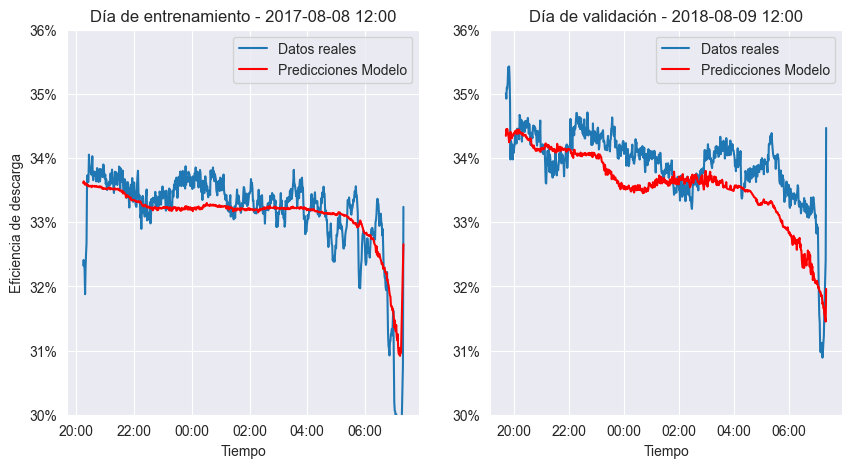

In [20]:
fecha_entrenamiento = '2017-08-08 12:00'
fecha_validacion = '2018-08-09 12:00'

dia_entrenamiento = datetime.strptime(fecha_entrenamiento, '%Y-%m-%d %H:%M')
dia_validacion = datetime.strptime(fecha_validacion, '%Y-%m-%d %H:%M')

# Filtrar datos dentro del rango de fechas
datos_dia_entrenamiento = datos.loc[dia_entrenamiento:dia_entrenamiento+pd.DateOffset(days=1)]
datos_dia_validacion = datos.loc[dia_validacion:dia_validacion+pd.DateOffset(days=1)]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Datos reales
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y='eficiencia_descarga', label='Datos reales', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y='eficiencia_descarga', label='Datos reales', ax=axes[1])

# Predicciones
sns.lineplot(data=datos_dia_entrenamiento, x=datos_dia_entrenamiento.index, y="eficiencia_descarga_bagging", color='red', label='Predicciones Modelo', ax=axes[0])
sns.lineplot(data=datos_dia_validacion, x=datos_dia_validacion.index, y="eficiencia_descarga_bagging", color='red', label='Predicciones Modelo', ax=axes[1])

# Formato
axes[0].set_title('Día de entrenamiento - ' + fecha_entrenamiento)
axes[1].set_title('Día de validación - ' + fecha_validacion)
axes[0].set_xlabel('Tiempo')
axes[1].set_xlabel('Tiempo')
axes[0].set_ylabel('Eficiencia de descarga')
axes[1].set_ylabel('')
axes[0].set_ylim(0.30, 0.36)
axes[1].set_ylim(0.30, 0.36)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

## Comparativa

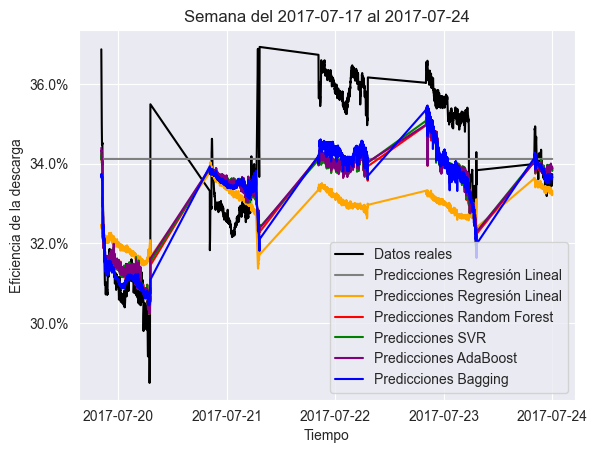

In [21]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Convertir fecha_inicio a tipo datetime
fecha_inicio = datetime.strptime('2017-07-17', '%Y-%m-%d')

# Calcular fecha_fin como 7 días después de fecha_inicio
fecha_fin = fecha_inicio + timedelta(days=7)

# Filtrar datos dentro del rango de fechas
datos_semana = datos.loc[fecha_inicio:fecha_fin]

# Configuración de la gráfica
sns.set_style('darkgrid')
fig, ax1 = plt.subplots()

# Datos reales
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga", color='black', label='Datos reales')

# Predicciones
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_media", color='grey', label='Predicciones Regresión Lineal')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_rl", color='orange', label='Predicciones Regresión Lineal')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_rf", color='red', label='Predicciones Random Forest')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_svr", color='green', label='Predicciones SVR')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_ada", color='purple', label='Predicciones AdaBoost')
sns.lineplot(data=datos_semana, x=datos_semana.index, y="eficiencia_descarga_bagging", color='blue', label='Predicciones Bagging')

ax1.set_ylabel('Eficiencia de la descarga')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.set_xlabel('Tiempo')
ax1.set_title('Semana del ' + fecha_inicio.strftime('%Y-%m-%d') + ' al ' + fecha_fin.strftime('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator())  # Establecer la frecuencia del eje x a diario
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha en el eje x
ax1.legend()

plt.show()